<a href="https://colab.research.google.com/github/AbdheshRathore/AbdheshRathore/blob/main/Carprice_Model_with_RFE_Simple_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Car Price Prediction (Linear Regression - RFE)

Prob Statment:

Data describng the car price based on its features in the market.
We have to understand the features on which the pricing of cars depends. Specifically, to understand the factors affecting the pricing of cars in market.

Business Goal

Drive the model to predict the price of car with available independent varianles. It will be use for bussiness purspective to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc.

Import required libraries and methods

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Upload Data

In [2]:
from google.colab  import files
uploaded=files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment.csv


Read and understand the data and features

In [3]:
df=pd.read_csv('CarPrice_Assignment.csv')
df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

1- Count of row 205

2- Count of columns 26

3- dtypes: float64(8), int64(8), object(10)

4- This is Regression type of problem, we will use Linear Regression Algorithm to prepare the model.

5- No Duplicates and No missing values presence in the data.

Seprate categorical variables and numerical variables with price atribute for

Analysis purpose


In [8]:
# Seprating categorical variable for Analysis with price column
df_cat=df[['CarName', 'fueltype', 'aspiration','doornumber', 'carbody', 'drivewheel', 'enginelocation','enginetype','cylindernumber','fuelsystem','price']]

In [9]:
df_cat.head(5)

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,price
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi,13495.0
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi,16500.0
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,16500.0
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi,13950.0
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi,17450.0


In [10]:
# Seprating Numeric Columns for Analysis with price
df_num=df.drop(columns=['CarName', 'fueltype', 'aspiration','doornumber', 'carbody', 'drivewheel', 'enginelocation','enginetype','cylindernumber','fuelsystem',],axis=1)

In [11]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   wheelbase         205 non-null    float64
 3   carlength         205 non-null    float64
 4   carwidth          205 non-null    float64
 5   carheight         205 non-null    float64
 6   curbweight        205 non-null    int64  
 7   enginesize        205 non-null    int64  
 8   boreratio         205 non-null    float64
 9   stroke            205 non-null    float64
 10  compressionratio  205 non-null    float64
 11  horsepower        205 non-null    int64  
 12  peakrpm           205 non-null    int64  
 13  citympg           205 non-null    int64  
 14  highwaympg        205 non-null    int64  
 15  price             205 non-null    float64
dtypes: float64(8), int64(8)
memory usage: 25.8 K

Catagorical  variable Analysis

Goal to obserbe the significant variable w.r.t price

In [12]:
df_cat.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'price'],
      dtype='object')

In [13]:
#check CarName columns
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

We can see the comapny name present in car name

Split the comapny name

In [14]:
df['CompanyName']=df['CarName'].apply(lambda x:  x.split(' ')[0])

In [15]:
df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

It seems that repeated name with diffrent spelling.

Make it proper with unique name by replacing name of company

In [16]:
df['CompanyName'].replace({'maxda':'mazda','Nissan':'nissan','porcshce':'porsche','toyouta':'toyota','vokswagen':'volkswagen','vw':'volkswagen'},inplace=True)

In [17]:
df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [18]:
df.drop('CarName',axis=1,inplace=True)

In [19]:
df_cat.insert(3,'CompanyName',df['CompanyName'])

In [20]:
df_cat.drop('CarName',axis=1,inplace=True)

In [21]:
df_cat.columns

Index(['fueltype', 'aspiration', 'CompanyName', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'price'],
      dtype='object')

In [22]:
# Price distribution Analysis
df['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

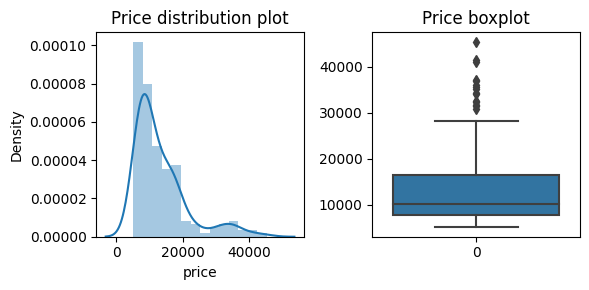

In [23]:
import warnings
warnings.filterwarnings('ignore')
fig,ax=plt.subplots(1,2, figsize=(6,3))
sns.distplot(df_cat['price'],ax=ax[0])
ax[0].set_title('Price distribution plot')
sns.boxplot(df_cat['price'],ax=ax[1])
ax[1].set_title('Price boxplot')
plt.tight_layout()
plt.show()

Visualization for
Fueltype :Car fuel type i.e gas or diesel

Aspiration :Aspiration used in a car

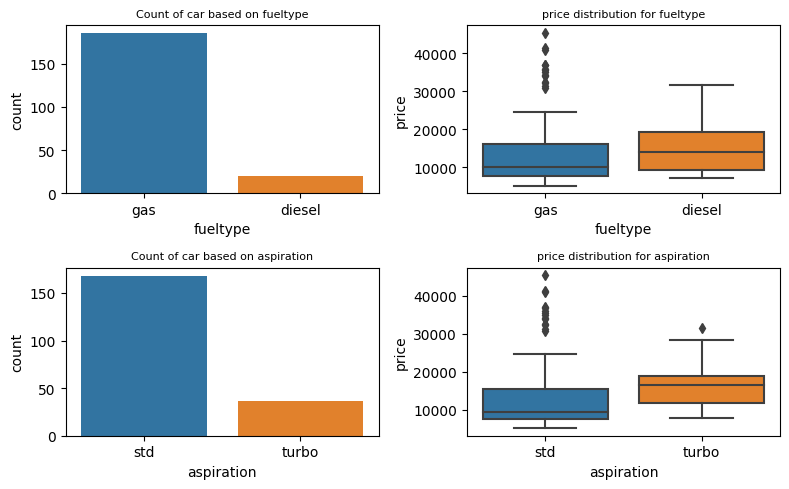

In [24]:
fig,ax=plt.subplots(2,2,figsize=(8,5))
sns.countplot(x=df_cat['fueltype'],ax=ax[0,0],data=df_cat)
ax[0,0].set_title('Count of car based on fueltype',size=8)
sns.boxplot(x='fueltype',y='price',ax=ax[0,1],data=df_cat)
ax[0,1].set_title('price distribution for fueltype',size=8)
sns.countplot(x=df_cat['aspiration'],ax=ax[1,0],data=df_cat)
ax[1,0].set_title('Count of car based on aspiration',size=8)
sns.boxplot(x='aspiration',y='price',ax=ax[1,1],data=df_cat)
ax[1,1].set_title('price distribution for aspiration',size=8)
plt.tight_layout()
plt.show()

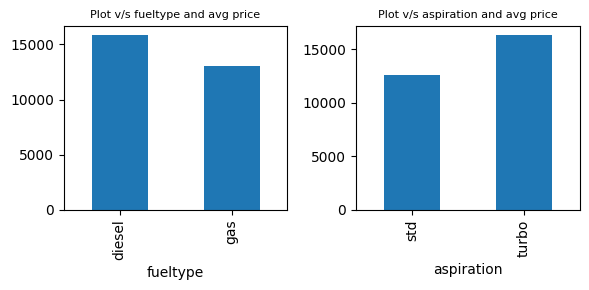

In [25]:
fig,ax=plt.subplots(1,2,figsize=(6,3))
df_cat.groupby('fueltype')['price'].mean().plot(kind='bar',ax=ax[0])
ax[0].set_title('Plot v/s fueltype and avg price',size=8)
df_cat.groupby('aspiration')['price'].mean().plot(kind='bar',ax=ax[1])
ax[1].set_title('Plot v/s aspiration and avg price',size=8)
plt.tight_layout()
plt.show()

1- The count of gas fueltype is high and the price range is low then diesel fueltype, avg price also low then diesel type cars, we can observe the price varience with fueltype

2- turbo type aspiration have high avg price then std type, but the  count of car have std type aspiration is more, it seems the variabtion of price based on spiration type.

doornumber

carbody

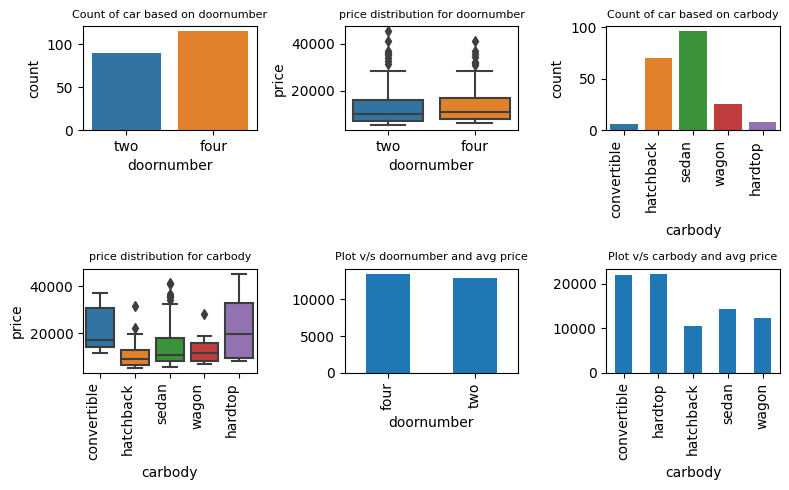

In [26]:
fig,ax=plt.subplots(2,3,figsize=(8,5))
sns.countplot(x=df_cat['doornumber'],ax=ax[0,0],data=df_cat)
ax[0,0].set_title('Count of car based on doornumber',size=8)
sns.boxplot(x='doornumber',y='price',ax=ax[0,1],data=df_cat)
ax[0,1].set_title('price distribution for doornumber',size=8)
sns.countplot(x=df_cat['carbody'],ax=ax[0,2],data=df_cat)
ax[0,2].set_title('Count of car based on carbody',size=8)
ax[0, 2].set_xticklabels(ax[0, 2].get_xticklabels(), rotation=90, ha='right')
sns.boxplot(x='carbody',y='price',ax=ax[1,0],data=df_cat)
ax[1,0].set_title('price distribution for carbody',size=8)
ax[1, 0].set_xticklabels(ax[1, 0].get_xticklabels(), rotation=90, ha='right')
df_cat.groupby('doornumber')['price'].mean().plot(kind='bar',ax=ax[1,1])
ax[1,1].set_title('Plot v/s doornumber and avg price',size=8)
df_cat.groupby('carbody')['price'].mean().plot(kind='bar',ax=ax[1,2])
ax[1,2].set_title('Plot v/s carbody and avg price',size=8)
plt.tight_layout()
plt.show()

1- The price range is apporx same not much diffrence for doornumber

2- For carbody the hardtop and convertible has highest pirce range  then other, its a significant variable

check
drivewheel
enginelocation

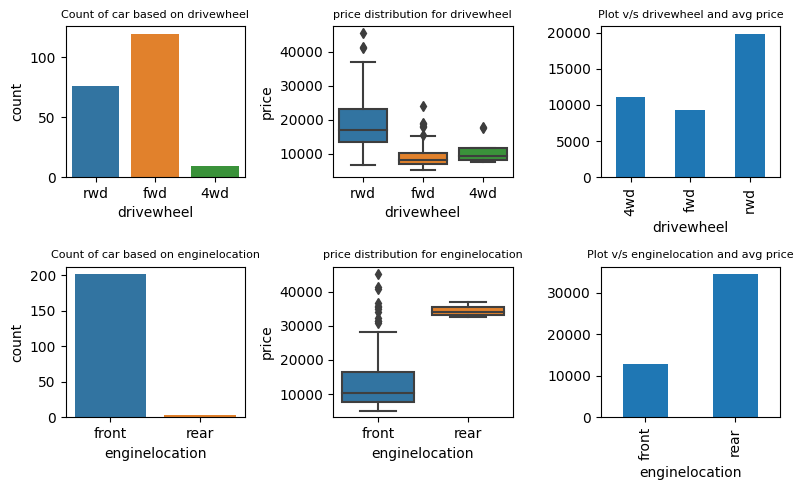

In [27]:
fig,ax=plt.subplots(2,3,figsize=(8,5))
sns.countplot(x=df_cat['drivewheel'],ax=ax[0,0],data=df_cat)
ax[0,0].set_title('Count of car based on drivewheel',size=8)
sns.boxplot(x='drivewheel',y='price',ax=ax[0,1],data=df_cat)
ax[0,1].set_title('price distribution for drivewheel',size=8)
df_cat.groupby('drivewheel')['price'].mean().plot(kind='bar',ax=ax[0,2])
ax[0,2].set_title('Plot v/s drivewheel and avg price',size=8)
sns.countplot(x=df_cat['enginelocation'],ax=ax[1,0],data=df_cat)
ax[1,0].set_title('Count of car based on enginelocation',size=8)
sns.boxplot(x='enginelocation',y='price',ax=ax[1,1],data=df_cat)
ax[1,1].set_title('price distribution for enginelocation',size=8)
df_cat.groupby('enginelocation')['price'].mean().plot(kind='bar',ax=ax[1,2])
ax[1,2].set_title('Plot v/s enginelocation and avg price',size=8)
plt.tight_layout()
plt.show()

In [28]:
df_cat['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [29]:
df_cat['enginelocation'].value_counts()/len(df_cat['enginelocation'])*100

front    98.536585
rear      1.463415
Name: enginelocation, dtype: float64

1- only 1.4 percent data is rare type, it have low price varience.

2- fwd drivewheel type have more count but rwd have high price range then the other, it is a significant variable

enginetype', 'cylindernumber

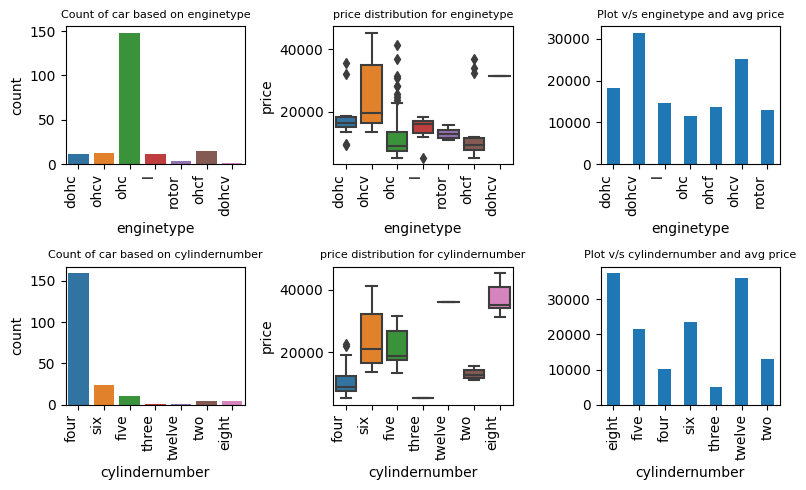

In [30]:
fig,ax=plt.subplots(2,3,figsize=(8,5))
# enginetype visualization
#1-Check the count of enginetype in present dat
sns.countplot(x=df_cat['enginetype'],ax=ax[0,0],data=df_cat)
ax[0,0].set_title('Count of car based on enginetype',size=8)
ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=90, ha='right')

# check price distribution and range for each type
sns.boxplot(x='enginetype',y='price',ax=ax[0,1],data=df_cat)
ax[0,1].set_title('price distribution for enginetype',size=8)
ax[0, 1].set_xticklabels(ax[0, 1].get_xticklabels(), rotation=90, ha='right')

# check avg price distibution based on enginetype
df_cat.groupby('enginetype')['price'].mean().plot(kind='bar',ax=ax[0,2])
ax[0,2].set_title('Plot v/s enginetype and avg price',size=8)
ax[0, 2].set_xticklabels(ax[0, 2].get_xticklabels(), rotation=90, ha='right')

# Cylindernumber visualiztion
sns.countplot(x=df_cat['cylindernumber'],ax=ax[1,0],data=df_cat)
ax[1,0].set_title('Count of car based on cylindernumber',size=8)
ax[1, 0].set_xticklabels(ax[1, 0].get_xticklabels(), rotation=90, ha='right')
sns.boxplot(x='cylindernumber',y='price',ax=ax[1,1],data=df_cat)
ax[1,1].set_title('price distribution for cylindernumber',size=8)
ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=90, ha='right')
df_cat.groupby('cylindernumber')['price'].mean().plot(kind='bar',ax=ax[1,2])
ax[1,2].set_title('Plot v/s cylindernumber and avg price',size=8)
plt.tight_layout()
plt.show()



1- it seems that ohc have highest count then other, and ohcv have highest range then other.

2- Count of car which have four cylinder is more then the other but the price range is high for eight and six cylindernumbers.

Check Fuel System

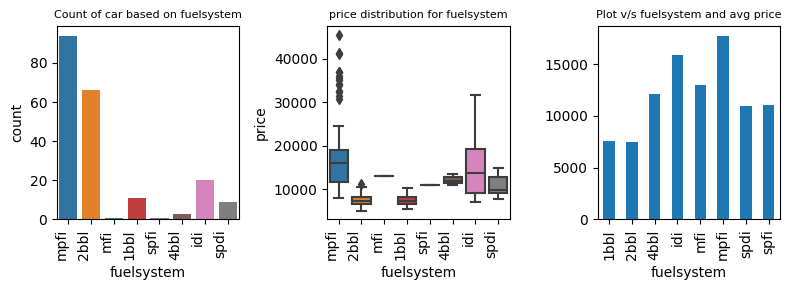

In [31]:
fig,ax=plt.subplots(1,3,figsize=(8,3))
sns.countplot(x=df_cat['fuelsystem'],ax=ax[0],data=df_cat)
ax[0].set_title('Count of car based on fuelsystem',size=8)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90, ha='right')
sns.boxplot(x='fuelsystem',y='price',ax=ax[1],data=df_cat)
ax[1].set_title('price distribution for fuelsystem',size=8)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha='right')
df_cat.groupby('fuelsystem')['price'].mean().plot(kind='bar',ax=ax[2])
ax[2].set_title('Plot v/s fuelsystem and avg price',size=8)
plt.tight_layout()
plt.show()

it seems that the price variation is much based on fuelsystem.

mpfi and 2bbl have highest count then other but idi and mpfi have highest range of price, and 2bbl has lowest range of price

Text(0.5, 1.0, 'Plot v/s CompanyName and avg price')

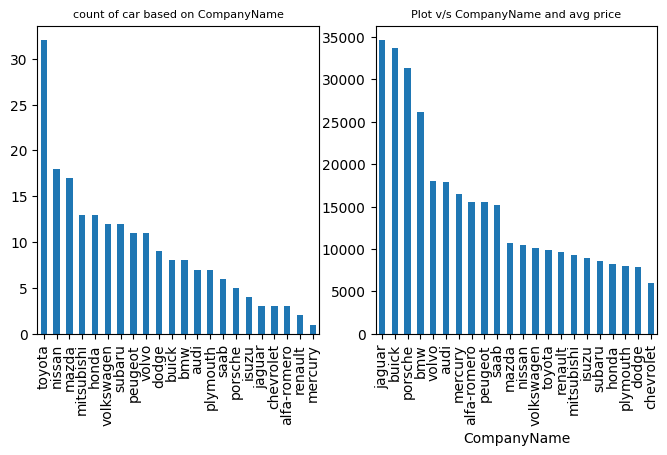

In [32]:
fig,ax=plt.subplots(1,2,figsize=(8,4))
df_cat['CompanyName'].value_counts().plot(kind='bar',ax=ax[0])
ax[0].set_title('count of car based on CompanyName',size=8)
df_cat.groupby('CompanyName')['price'].mean().sort_values(ascending=False).plot(kind='bar',ax=ax[1])
ax[1].set_title('Plot v/s CompanyName and avg price',size=8)

It seems to high variation, but it difficult to dummification so need to make new feature based on avg price

In [33]:
df1=df.groupby('CompanyName')['price'].mean()
df=df.merge(df1.reset_index(), how='left',on='CompanyName')


In [34]:
df['carsrange'] = pd.cut(x=df['price_y'],bins = [0,10000,20000,40000],right=True,labels=['Budget','Medium','Highend'])

In [35]:
df.drop('price_y',axis=1,inplace=True)

In [36]:
df.drop('CompanyName',axis=1,inplace=True)

In [37]:
df.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price_x',
       'carsrange'],
      dtype='object')

Significant categorical variables (8)

1-fueltype

2-aspiration

3-carbody

4-drivewheel

5-enginetype

6-cylindernumber

7-fuelsystem

8-carsrange


Numeric Variable Analysis

In [38]:
df_num.columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

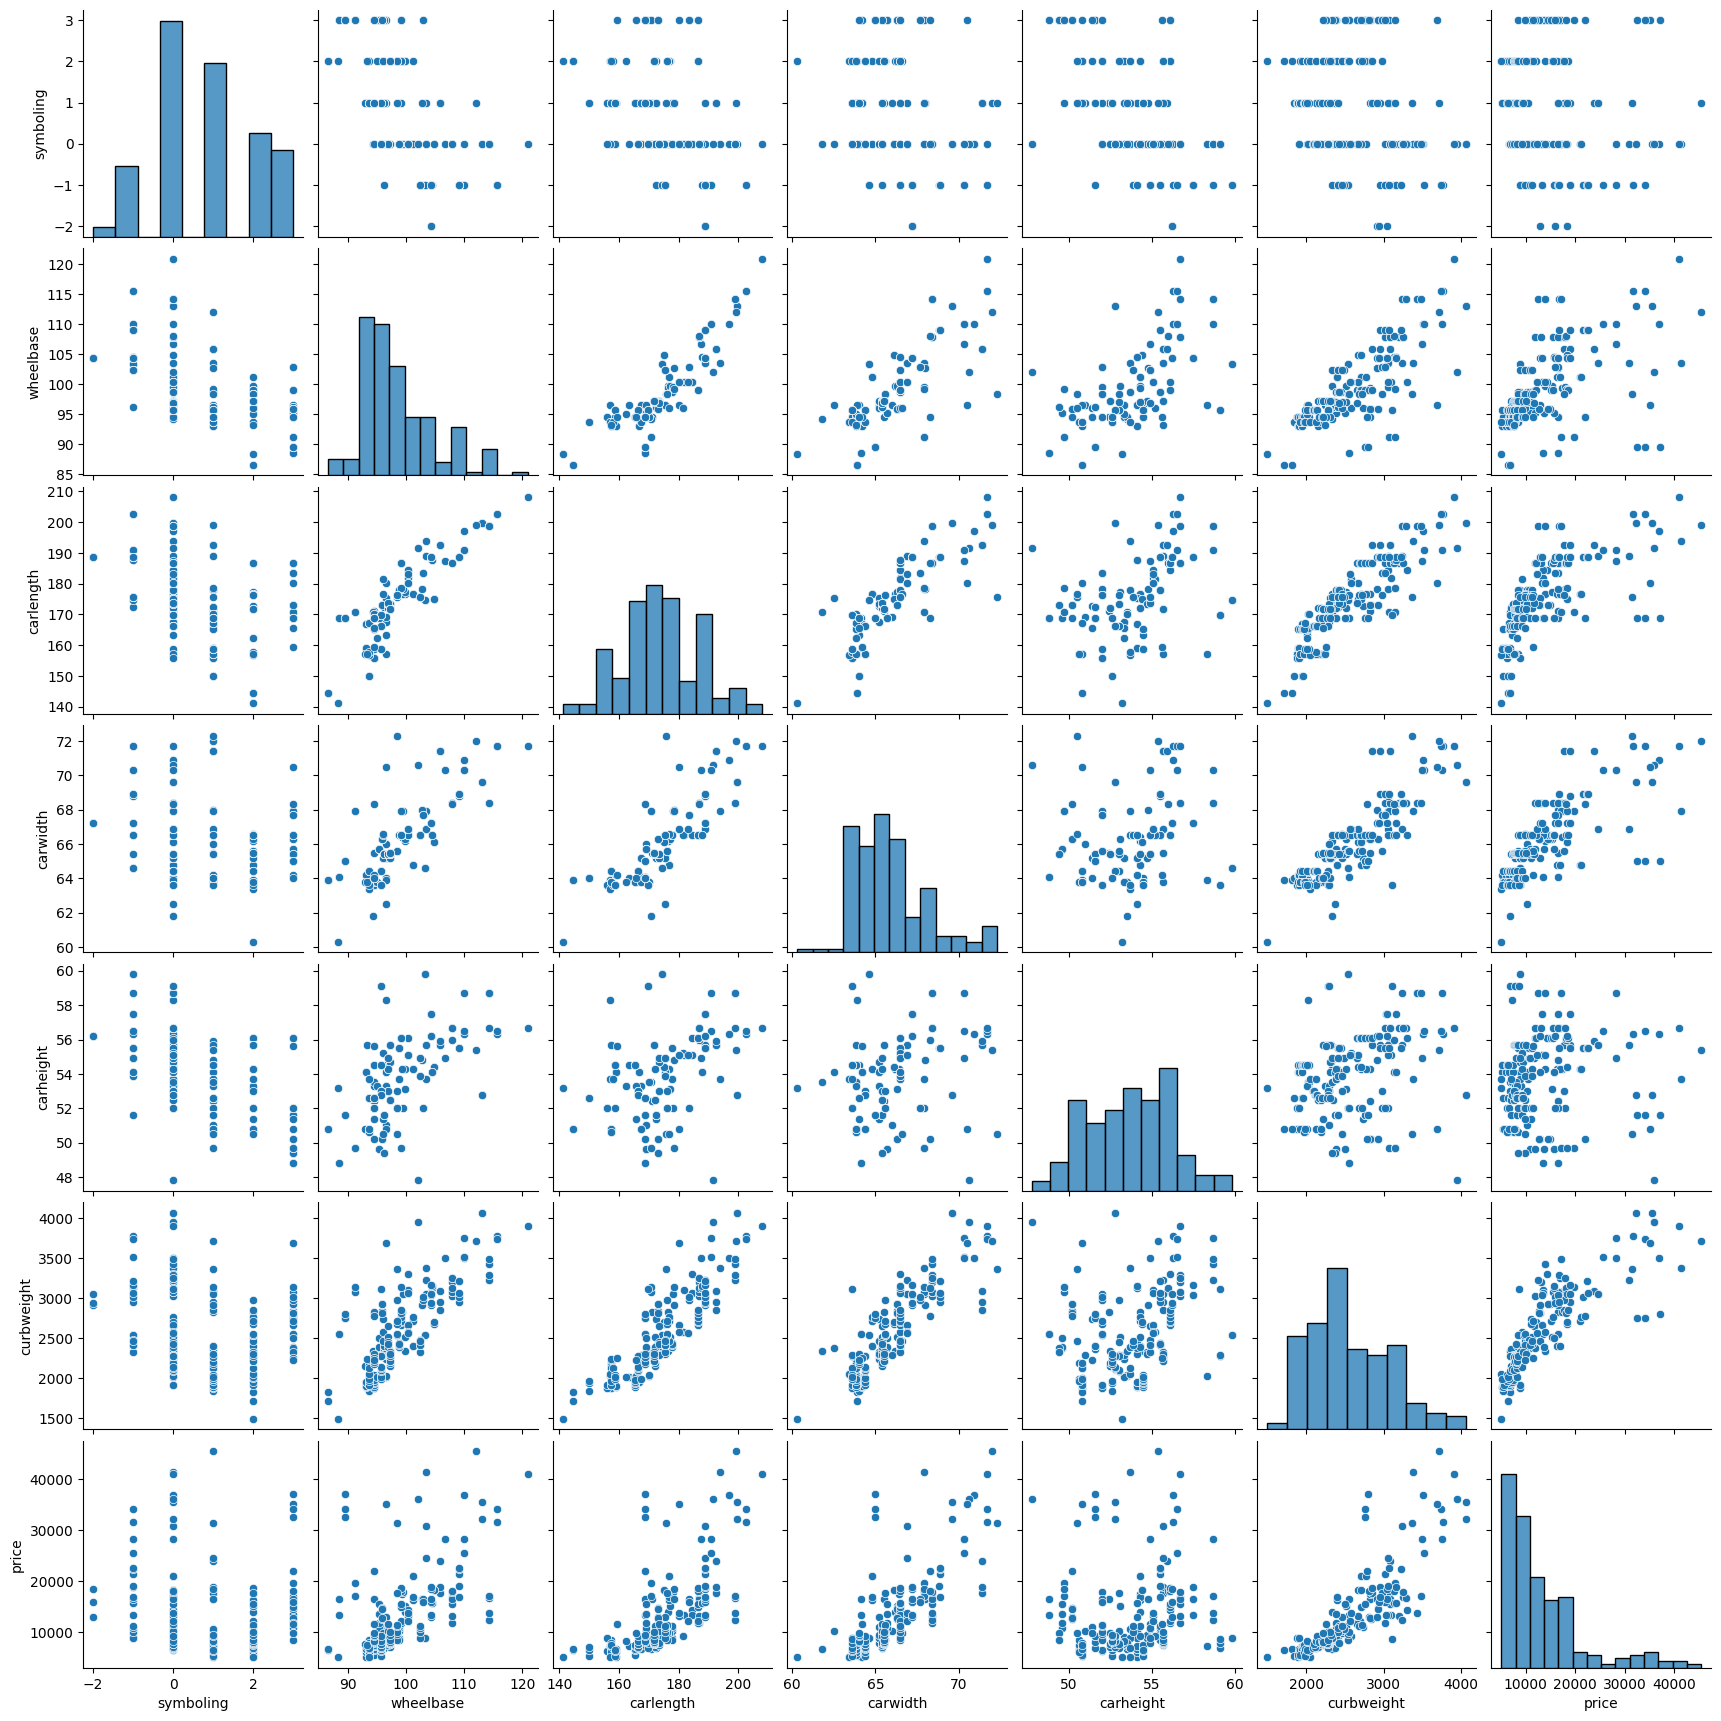

In [348]:
sns.pairplot(df_num[['symboling', 'wheelbase', 'carlength', 'carwidth','carheight', 'curbweight','price']])

Symboling and carhight does not show any significant trend with price.

Carlength, carwidth,wheelbase and curbweight have strong posetive corelation with price

wheelbase showing colinearity with curbweight,carwidth and carhight

carlength showing colinearity with curbweight and carwidth

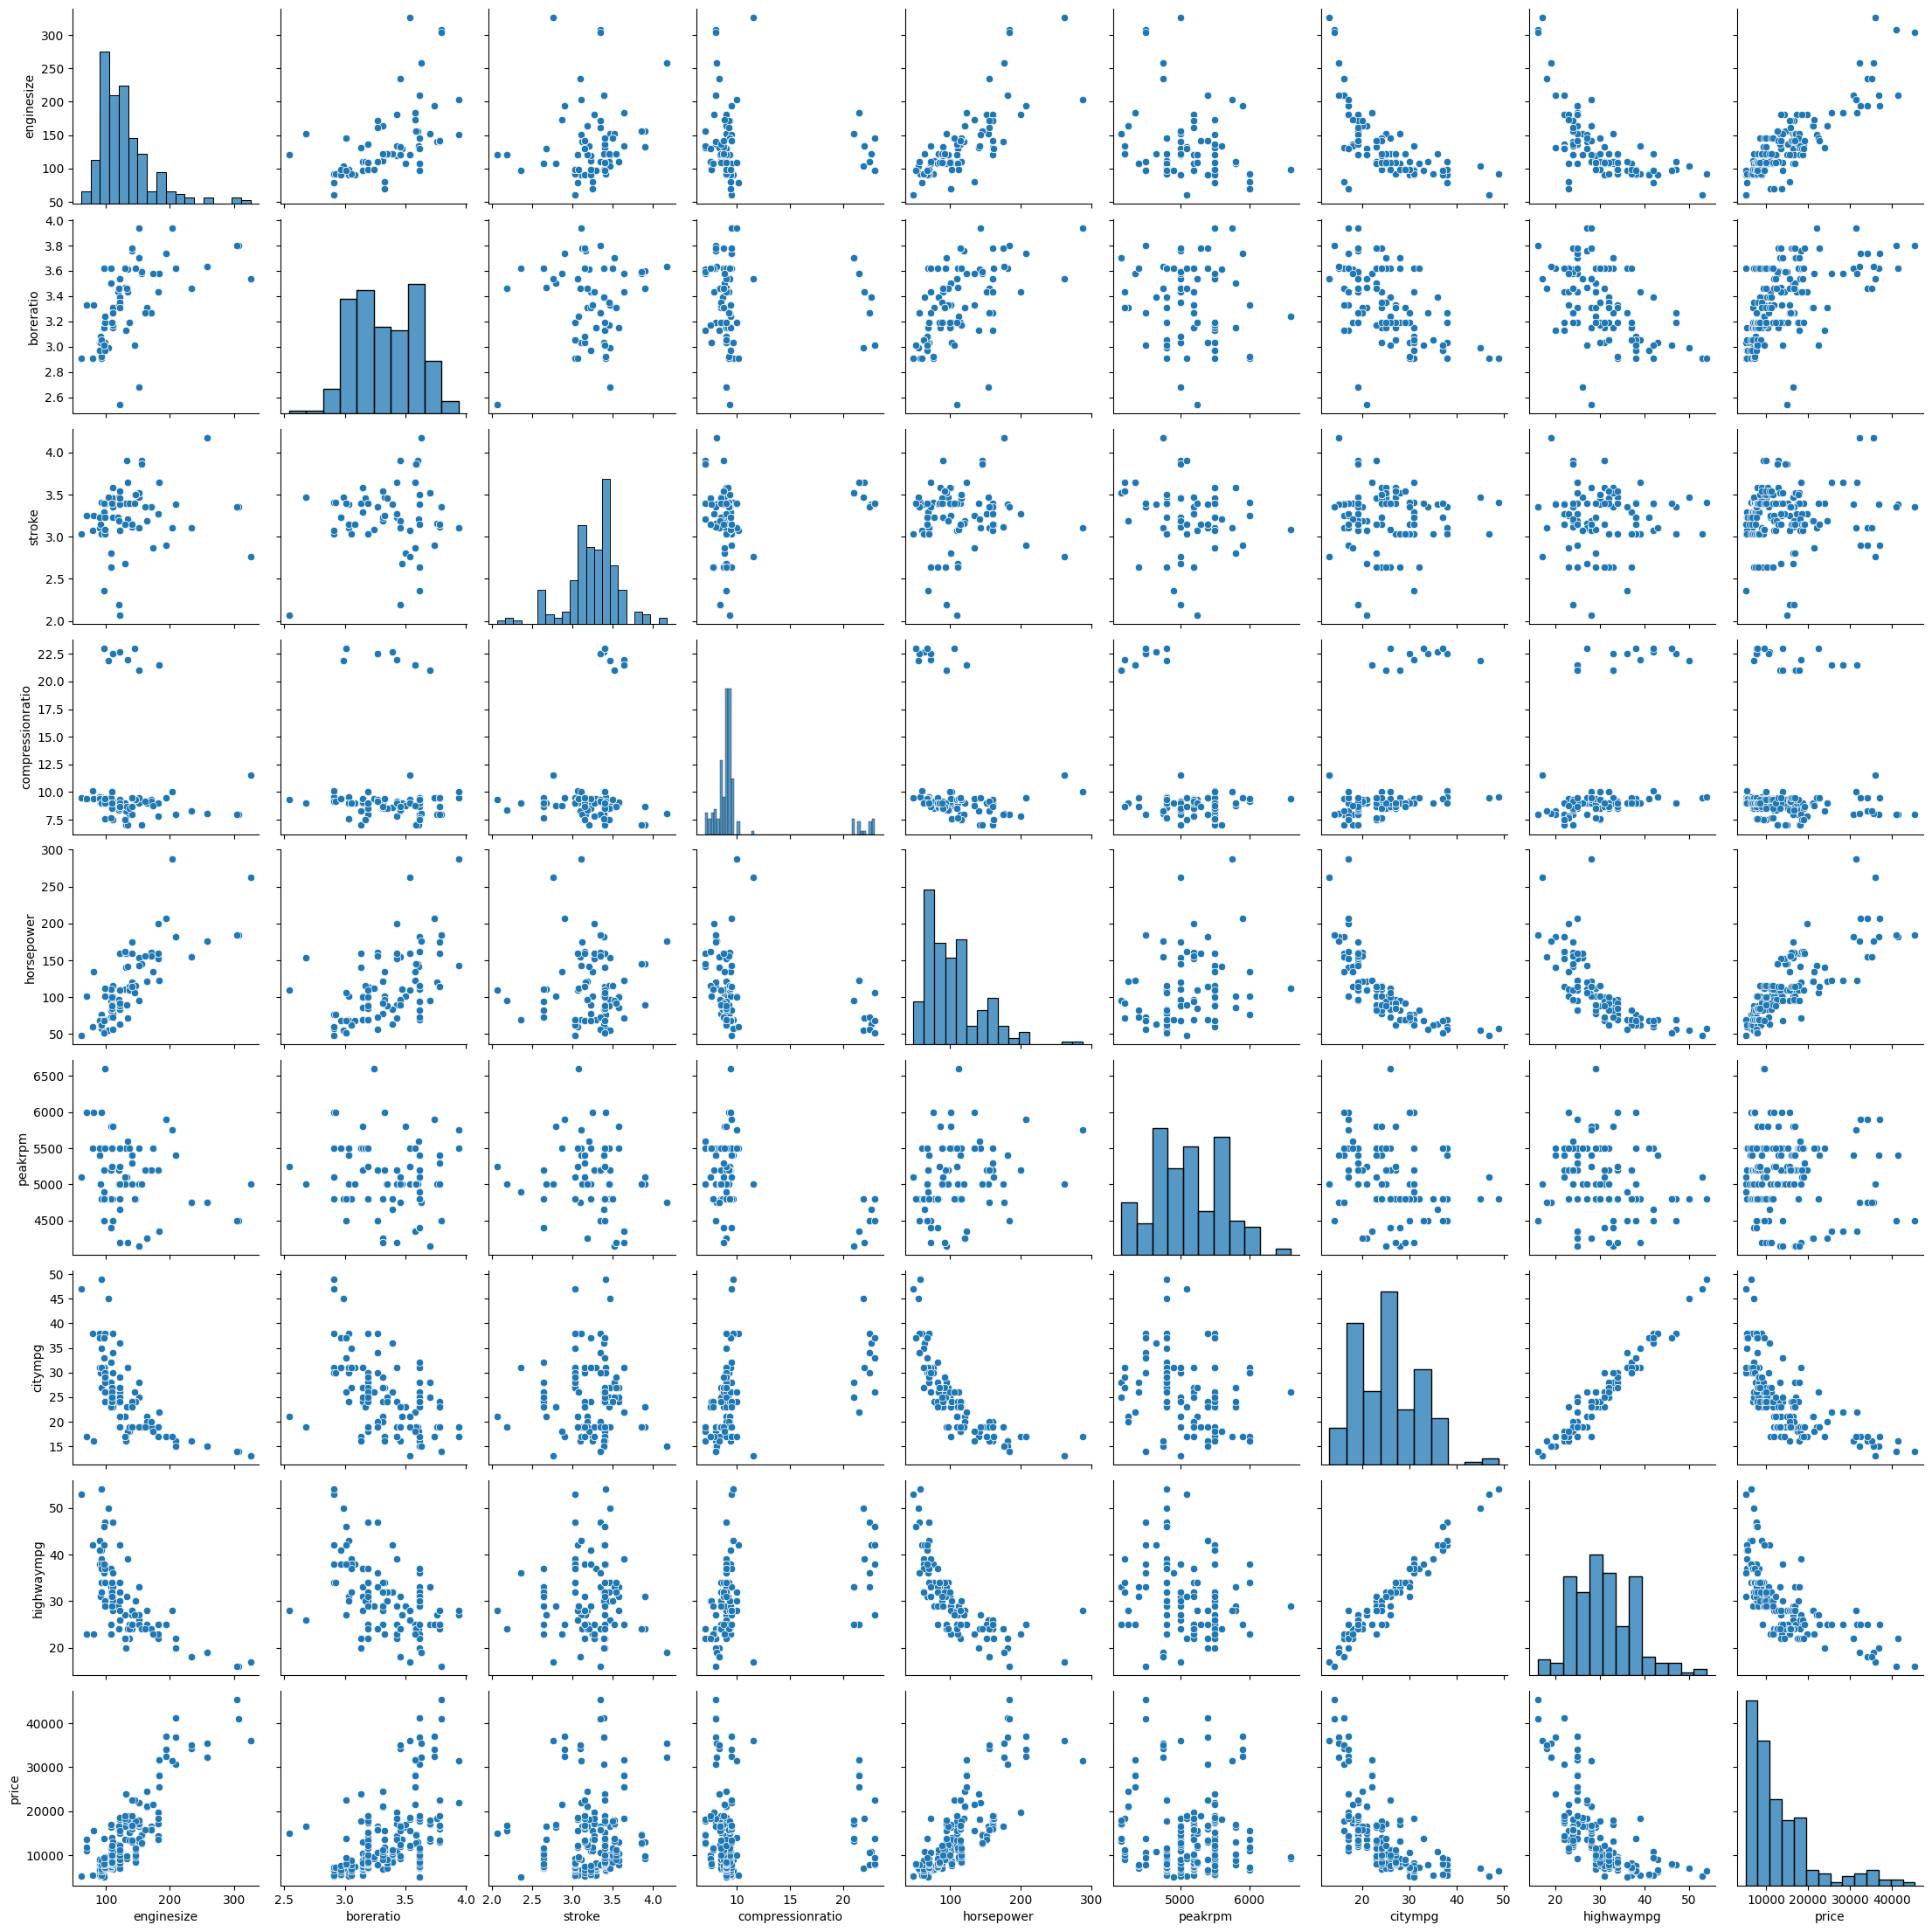

In [39]:
sns.pairplot(df_num[['enginesize', 'boreratio', 'stroke','compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg','price']])

Stroke and compressionration and peakrpm dont show any significant trend with price

enginesize, boreratio, horsepower showing posetive corelation with price

citympg and highwaympg showing negative corelation with price

enginesize showing colinearity with horspower highwaympg and citympg





Significant variables(numeric)

1-'wheelbase'

2-'carlength'

3-'carwidth'

4-'curbweight'

5-'enginesize'

6-'boreratio'

7-'stroke'

8-'horsepower'

9-'citympg'

10-'highwaympg'

11-'price'

In [40]:
# citympg and highwaympg both are correlated we can compute new feature avgmpg
df['citympg'].describe()

count    205.000000
mean      25.219512
std        6.542142
min       13.000000
25%       19.000000
50%       24.000000
75%       30.000000
max       49.000000
Name: citympg, dtype: float64

In [41]:
df['highwaympg'].describe()

count    205.000000
mean      30.751220
std        6.886443
min       16.000000
25%       25.000000
50%       30.000000
75%       34.000000
max       54.000000
Name: highwaympg, dtype: float64

In [42]:
df['avgmpg']=.55*df['citympg']+.45*df['highwaympg']

In [43]:
df.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price_x',
       'carsrange', 'avgmpg'],
      dtype='object')

In [44]:
df.drop(columns=['citympg','highwaympg'],axis=1,inplace=True)

Total Significant variables

['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem', 'carsrange','wheelbase', 'carlength', 'carwidth','curbweight', 'enginesize', 'boreratio','stroke','horsepower', 'avgmpg','price']


In [45]:
df=df[['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem', 'carsrange','wheelbase', 'carlength', 'carwidth','curbweight', 'enginesize', 'boreratio','stroke','horsepower', 'avgmpg','price_x']]

In [46]:
df.shape

(205, 18)

Feature Scalling

In [47]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()


In [48]:

numeric_columns=['wheelbase', 'carlength', 'carwidth','curbweight', 'enginesize', 'boreratio','stroke','horsepower', 'avgmpg']

In [49]:
df[numeric_columns]=sc.fit_transform(df[numeric_columns])

In [50]:
df.head(5)

,fueltype,aspiration,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,carsrange,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,stroke,horsepower,avgmpg,price_x
0,gas,std,convertible,rwd,dohc,four,mpfi,Medium,0.058309,0.413433,0.316667,0.411171,0.260377,0.664286,0.290476,0.262500,0.244170,13495.0
1,gas,std,convertible,rwd,dohc,four,mpfi,Medium,0.058309,0.413433,0.316667,0.411171,0.260377,0.664286,0.290476,0.262500,0.244170,16500.0
2,gas,std,hatchback,rwd,ohcv,six,mpfi,Medium,0.230321,0.449254,0.433333,0.517843,0.343396,0.100000,0.666667,0.441667,0.201646,16500.0
3,gas,std,sedan,fwd,ohc,four,mpfi,Medium,0.384840,0.529851,0.491667,0.329325,0.181132,0.464286,0.633333,0.225000,0.326475,13950.0
4,gas,std,sedan,4wd,ohc,five,mpfi,Medium,0.373178,0.529851,0.508333,0.518231,0.283019,0.464286,0.633333,0.279167,0.137174,17450.0


Features dummification

In [51]:
cat_columns=['fueltype','aspiration','carbody','drivewheel','enginetype','cylindernumber','fuelsystem','carsrange']
df=pd.get_dummies(df,columns=['fueltype','aspiration','carbody','drivewheel','enginetype','cylindernumber','fuelsystem','carsrange'],drop_first=True)

In [52]:
df.head(5)

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,stroke,horsepower,avgmpg,price_x,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,carsrange_Medium,carsrange_Highend
0,0.058309,0.413433,0.316667,0.411171,0.260377,0.664286,0.290476,0.262500,0.244170,13495.0,...,0,0,0,0,0,1,0,0,1,0
1,0.058309,0.413433,0.316667,0.411171,0.260377,0.664286,0.290476,0.262500,0.244170,16500.0,...,0,0,0,0,0,1,0,0,1,0
2,0.230321,0.449254,0.433333,0.517843,0.343396,0.100000,0.666667,0.441667,0.201646,16500.0,...,0,0,0,0,0,1,0,0,1,0
3,0.384840,0.529851,0.491667,0.329325,0.181132,0.464286,0.633333,0.225000,0.326475,13950.0,...,0,0,0,0,0,1,0,0,1,0
4,0.373178,0.529851,0.508333,0.518231,0.283019,0.464286,0.633333,0.279167,0.137174,17450.0,...,0,0,0,0,0,1,0,0,1,0


Check Correlation b/w all features using heatmap

<Axes: >

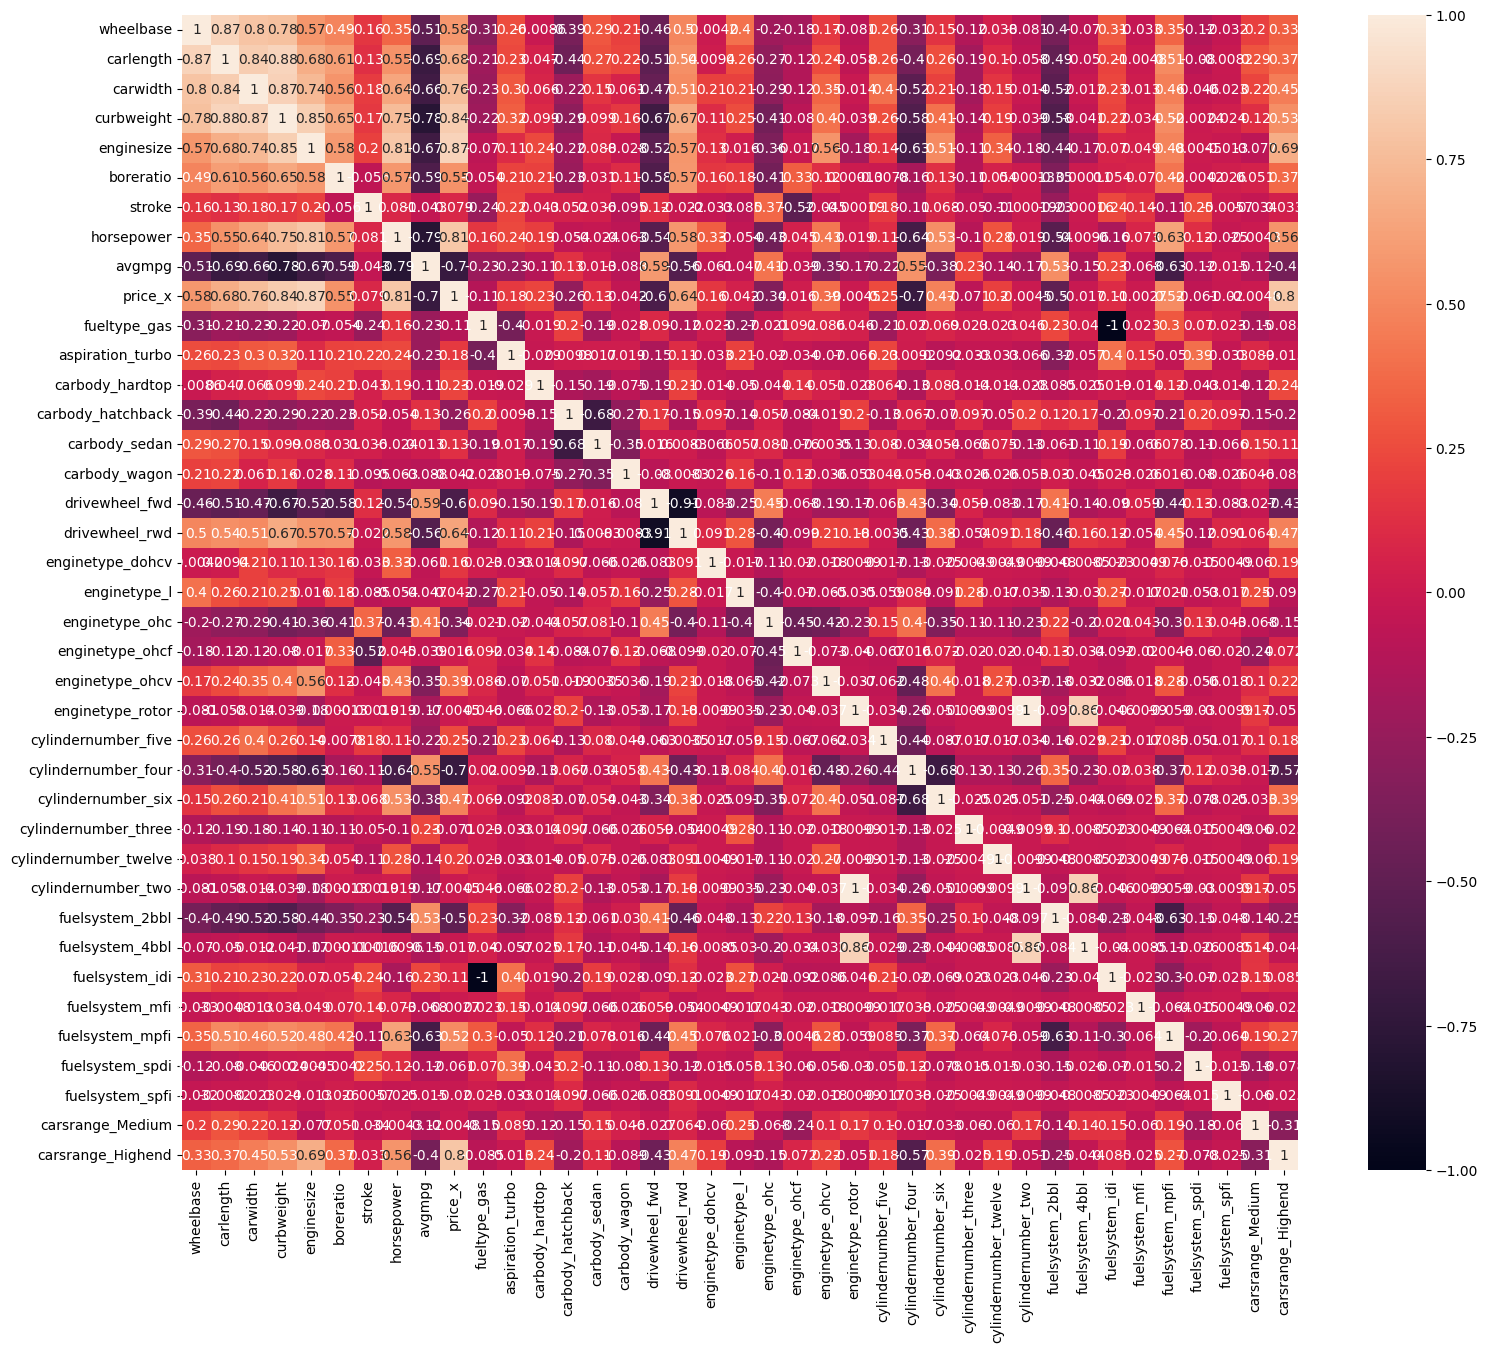

In [53]:
fig,ax=plt.subplots(1,1,figsize=(18,15))
sns.heatmap(df.corr(),annot=True)

Some of variables showing strong positive correlation and some of negative.

Need to treat Multicolinearity.



In [54]:
df.shape

(205, 39)

In [55]:
y=df['price_x']
X=df.drop('price_x',axis=1)

In [56]:
y.head(5)

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price_x, dtype: float64

In [57]:
X.head(5)

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,stroke,horsepower,avgmpg,fueltype_gas,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,carsrange_Medium,carsrange_Highend
0,0.058309,0.413433,0.316667,0.411171,0.260377,0.664286,0.290476,0.262500,0.244170,1,...,0,0,0,0,0,1,0,0,1,0
1,0.058309,0.413433,0.316667,0.411171,0.260377,0.664286,0.290476,0.262500,0.244170,1,...,0,0,0,0,0,1,0,0,1,0
2,0.230321,0.449254,0.433333,0.517843,0.343396,0.100000,0.666667,0.441667,0.201646,1,...,0,0,0,0,0,1,0,0,1,0
3,0.384840,0.529851,0.491667,0.329325,0.181132,0.464286,0.633333,0.225000,0.326475,1,...,0,0,0,0,0,1,0,0,1,0
4,0.373178,0.529851,0.508333,0.518231,0.283019,0.464286,0.633333,0.279167,0.137174,1,...,0,0,0,0,0,1,0,0,1,0


Train-Test Split and feature scaling

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.33,random_state=100)

In [59]:
X_train.shape

(137, 38)

In [60]:
y_train.shape

(137,)

In [61]:
X_test.shape

(68, 38)

In [372]:
y_test.shape

(68,)

Feature Selection using RFE

In [62]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
model=LinearRegression()
param_dist = {'n_features_to_select': np.arange(1, X_train.shape[1] + 1)}
rfe=RFE(model)
random_search = RandomizedSearchCV(estimator=rfe,param_distributions=param_dist,n_iter=15, cv=5,random_state=100)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RFE(estimator=LinearRegression()), n_iter=15,
                   param_distributions={'n_features_to_select': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38])},
                   random_state=100)

In [63]:
# Get the best parameter value and best score
best_n_features = random_search.best_params_['n_features_to_select']
best_score = random_search.best_score_
print(best_n_features,best_score)

6 0.8747779935580711


In [64]:
rfe=RFE(model,n_features_to_select=6)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=6)

In [65]:
rfe.support_

array([False, False,  True,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True])

In [66]:
rfe.ranking_

array([15, 14,  1,  1,  5,  3,  4,  1, 18,  7, 27, 21, 17, 20, 19, 29, 31,
        1, 22,  9, 13, 10,  6, 24, 11, 30,  1,  2,  8, 26, 28, 23, 32, 25,
       12, 33, 16,  1])

In [67]:
X_train_rfe=X_train.columns[rfe.support_]

In [68]:
X_train_rfe=X_train[X_train_rfe]

In [69]:
X_train_rfe.shape

(137, 6)

In [70]:
X_train_rfe.columns

Index(['carwidth', 'curbweight', 'horsepower', 'enginetype_dohcv',
       'cylindernumber_three', 'carsrange_Highend'],
      dtype='object')

Model Builing

Building model using statsmodel, for the detailed statistics

In [71]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
def build_model(X,y):
  X=sm.add_constant(X)
  lm=sm.OLS(y,X).fit()
  print(lm.summary())


def checkVIF(X):
    X=sm.add_constant(X)
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [73]:
build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                price_x   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     262.1
Date:                Fri, 25 Aug 2023   Prob (F-statistic):           4.62e-70
Time:                        11:47:51   Log-Likelihood:                -1247.1
No. Observations:                 137   AIC:                             2508.
Df Residuals:                     130   BIC:                             2529.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  683.1051 

cylindernumber_three  showinh highest P value and its greter than significant value .05

Remodel with without cylindernumber_three , it showing insignicance for model

In [74]:
X_train_new=X_train_rfe.drop(columns=['cylindernumber_three'],axis=1)

In [75]:
build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                price_x   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     307.3
Date:                Fri, 25 Aug 2023   Prob (F-statistic):           1.58e-70
Time:                        11:48:24   Log-Likelihood:                -1249.1
No. Observations:                 137   AIC:                             2510.
Df Residuals:                     131   BIC:                             2528.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               965.3005    566.65

In [76]:
checkVIF(X_train_new)

,Features,VIF
0,const,8.65
2,curbweight,6.83
1,carwidth,4.76
3,horsepower,3.11
5,carsrange_Highend,1.60
4,enginetype_dohcv,1.44


curbweight	Showing VIF more then 5

In [77]:
X_train_new=X_train_new.drop(columns=['curbweight'],axis=1)
build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                price_x   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     359.6
Date:                Fri, 25 Aug 2023   Prob (F-statistic):           6.43e-70
Time:                        11:48:38   Log-Likelihood:                -1253.7
No. Observations:                 137   AIC:                             2517.
Df Residuals:                     132   BIC:                             2532.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               713.2680    577.50

In [78]:
checkVIF(X_train_new)

,Features,VIF
0,const,8.47
2,horsepower,2.38
1,carwidth,1.96
4,carsrange_Highend,1.51
3,enginetype_dohcv,1.19


P value and VIF for all features showing significant value, check error term

<Axes: ylabel='Density'>

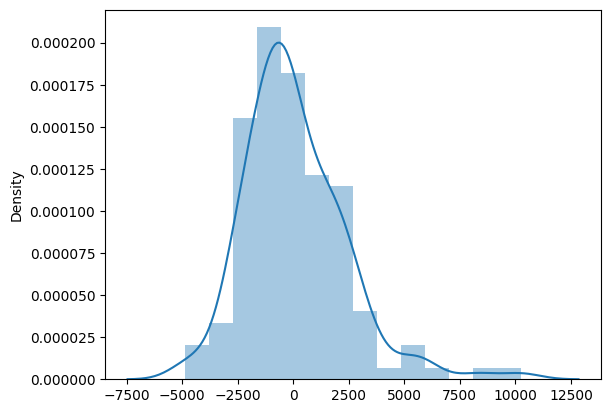

In [79]:
lm=sm.OLS(y_train,X_train_new).fit()
y_train_pred=lm.predict(X_train_new)

sns.distplot(y_train-y_train_pred)

P value less then .05 for all variables as VIF also lower then 5 but error term not normaly distributed, lets check remove some other

In [80]:
X_train_new=X_train_new.drop(columns=['enginetype_dohcv'],axis=1)

In [81]:

build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                price_x   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     397.4
Date:                Fri, 25 Aug 2023   Prob (F-statistic):           3.54e-66
Time:                        11:49:06   Log-Likelihood:                -1265.8
No. Observations:                 137   AIC:                             2540.
Df Residuals:                     133   BIC:                             2551.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1109.6540    622.87

1-Prob ( F-Statistic ) 3.54 * 10^-66 is approximate 0 and less then .05, it showing model is significance .

2- All independent variable showing p value zero, its indicate all independent variables are significant.

3- R2 = 90 and AdjR2 89.7 R2 and Adj R2 is approximately same it is indicate that there is one ingnifcant variable.


# Check OLS Assumption

1- Check Multicollinearty

By VIF already checked

By model summary C.No is 11.9  which indicate is less then 100 and indicate that there is no multicollinerity existance.

2- Check the existence of linear relationship b/w independent and dependent variable.

In [82]:
lm=sm.OLS(y_train,X_train_new).fit()
y_train_pred=lm.predict(X_train_new)
error=(y_train-y_train_pred)

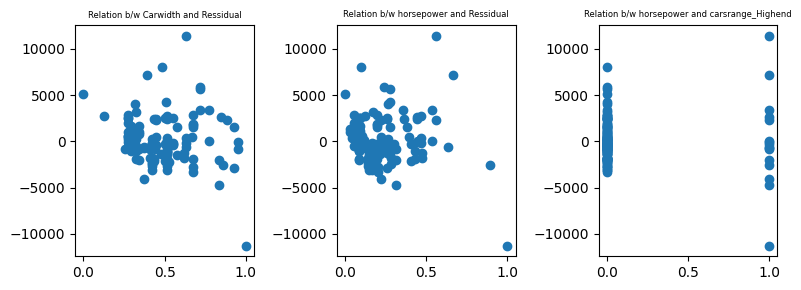

In [85]:
fig,ax=plt.subplots(1,3,figsize=(8,3))
ax[0].scatter(x=X_train['carwidth'],y=error)
ax[0].set_title('Relation b/w Carwidth and Ressidual',size=6)
ax[1].scatter(x=X_train['horsepower'],y=error)
ax[1].set_title('Relation b/w horsepower and Ressidual',size=6)
ax[2].scatter(x=X_train['carsrange_Highend'],y=error)
ax[2].set_title('Relation b/w horsepower and carsrange_Highend',size=6)
plt.tight_layout()
plt.show();

3- Check Autocorrelation for error term.

It can be checked by Durbin weston, if DB=2 No autocorelation, if DB>2, DB<2, -ve and +ve correlation exist

Model DB is 2.018, its almost equal to 2 so it indicate that there are no autocorrelation presence in ressidual.

## 3- Check homoscedasticity of error term.

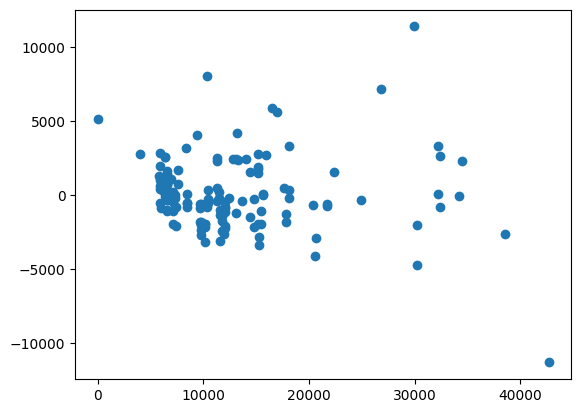

In [87]:
plt.scatter(x=y_train_pred,y=error)
plt.show()

Most of value under the range 5000 to -5000, it showing constant varience with predicted value. there are 2, 3 points outof limit.

Check Error normaly distribute or not

prob(Jarque-Bera) showing value near about 0 its indicate error normaly distributed.



In [88]:
print(error.skew(),error.kurtosis())


0.5184923449555292 5.5470026673277015


Skewness and kurtosis value should be zero for a good fit model

## Model **Prediction**

<Axes: ylabel='Density'>

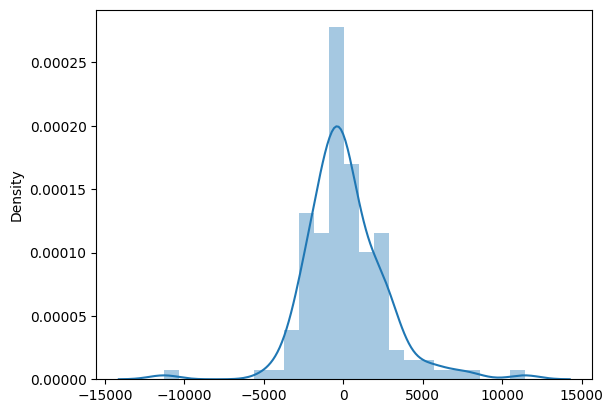

In [89]:
sns.distplot(y_train-y_train_pred)

Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.

# Prediction Evalution

In [90]:
X_test_new = X_test[X_train_new.columns]

In [91]:
X_test_new = sm.add_constant(X_test_new)

In [92]:
lm=sm.OLS(y_test,X_test_new).fit()

In [93]:
y_pred = lm.predict(X_test_new)

In [94]:
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np

In [95]:

R2_train=r2_score(y_train_pred,y_train)
R2_test=r2_score(y_pred,y_test)
print(R2_train," ",R2_test)
# Check RMS
RMSE_train=np.sqrt(mean_squared_error(y_train_pred,y_train))
RMSE_test=np.sqrt(mean_squared_error(y_pred,y_test))
print(RMSE_train," ",RMSE_test)

0.8921866004723615   0.8870125498762708
2521.438533888814   2596.018986113262


In [96]:
error_test=(y_pred-y_test)
print(error_test.skew(),error_test.kurtosis())

-0.13487778094240277 1.5151414628367208


Error Term for testing showing batter than training model, it is normally distributed.

In [101]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                price_x   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     188.8
Date:                Fri, 25 Aug 2023   Prob (F-statistic):           9.93e-32
Time:                        11:54:49   Log-Likelihood:                -631.09
No. Observations:                  68   AIC:                             1270.
Df Residuals:                      64   BIC:                             1279.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               605.0830   1032.33

Text(0, 0.5, 'y_pred')

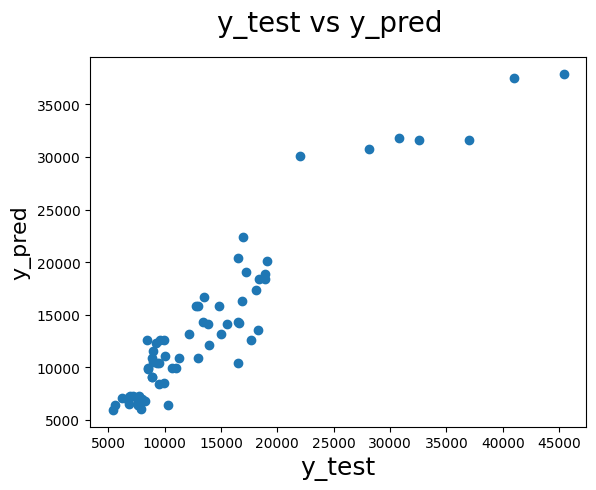

In [102]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

inference :

1-R-sqaured and Adjusted R-squared (extent of fit) - 0.898 and 0.894 - 90% variance explained.

2-F-stats and Prob(F-stats) (overall model fit) - 188.0 and 9.93e-32(approx. 0.0) - Model fir is significant and explained 90% variance is just not by chance.

3-p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.

4-C.No is 11.9  which indicate no multicollinerity presence.

5-Model DB is 2.018, its almost equal to 2 so it indicate that there are no autocorrelation presence in ressidual.

6-Homoscdesticity,Most of value under the range 5000 to -5000, but there are some data points slighlty spred in both side. its indicate error term not constat at some of points.

7-prob(Jarque-Bera) and distplot showing error normaly distributed but skewness and kurtosis is high, it should be near about zero.

8- Predicted Model showing Good Accuration, DB is less then 2 and skewness/Kurtosis better then training model. but JB is high.

